In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 
from scipy.stats import skew
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
#dataの読み込み

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# データ数の確認
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
#欠損値の多いものは削除
train = train.drop(columns=["PoolQC","MiscFeature","Alley","Fence" ,"FireplaceQu" ,"LotFrontage"])


In [5]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [6]:
train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]+train['GarageArea']
train['YearBuilt'] = 2011 - train['YearBuilt']
train['YrSold'] = 2011 - train['YrSold']
train['GarageYrBlt']  =2011 - train["GarageYrBlt"]
test["TotalSF"] = test["TotalBsmtSF"] + test["1stFlrSF"] + test["2ndFlrSF"]+test['GarageArea']
test['YearBuilt'] = 2011 - test['YearBuilt']
test['YrSold'] = 2011 - test['YrSold']
test['GarageYrBlt']  =2011 - test["GarageYrBlt"]

In [7]:
train.drop(['1stFlrSF','GarageArea',"TotalBsmtSF",'TotRmsAbvGrd',"2ndFlrSF"], axis=1, inplace=True)

test.drop(['1stFlrSF','GarageArea',"TotalBsmtSF",'TotRmsAbvGrd',"2ndFlrSF"], axis=1, inplace=True)

In [8]:
np.abs(train.corr()["SalePrice"]).sort_values(ascending=False).head(10).index


Index(['SalePrice', 'TotalSF', 'OverallQual', 'GrLivArea', 'GarageCars',
       'ExterQual_TA', 'FullBath', 'BsmtQual_Ex', 'YearBuilt',
       'KitchenQual_TA'],
      dtype='object')

In [9]:
# plt.figure(figsize=(12, 9))
# sns.heatmap(train.loc[:,['SalePrice', 'TotalSF', 'OverallQual', 'GrLivArea', 'GarageCars',
# #        'ExterQual_TA', 'FullBath', 'BsmtQual_Ex', 'YearBuilt',
#        'KitchenQual_TA']].corr(), annot=True, square=True, fmt='.2f')
# # plt.savefig('figure.png')

In [10]:
train["OverallQual_2"]=train["OverallQual"]**2
# train["OverallQual_3"]=train["OverallQual"]**3
train["TotalSF_2"]=train["TotalSF"]**2

In [11]:
# sns.pairplot(train.loc[:,[ 'TotalSF', 'OverallQual', 'GrLivArea', 'YearBuilt',"SalePrice"]])
# # plt.savefig('figure2.png')

In [12]:
# sns.jointplot('GrLivArea',"SalePrice",data= train)
# # plt.savefig('figure3.png')

In [13]:
train = train[~((train['GrLivArea'] > 4000) & (train['SalePrice'] < 250000))]

In [14]:
# sns.jointplot('GrLivArea',"SalePrice",data= train)
# # plt.savefig('figure4.png')

In [15]:
# sns.jointplot('OverallQual',"SalePrice",data= train)
# # plt.savefig('figure5.png')

In [16]:
# wwwwwwww

In [17]:
# train["OverallQual_2"]=train["OverallQual"]**2

In [18]:
# plt.figure(figsize=(12, 9))
# sns.heatmap(train.loc[:,['SalePrice', 'OverallQual','OverallQual_2', 'TotalSF', 'GrLivArea', 'GarageCars',
#        'ExterQual_TA', 'FullBath', 'BsmtQual_Ex', 'YearBuilt',
#        'KitchenQual_TA']].corr(), annot=True, square=True, fmt='.2f')
# plt.show()

In [19]:
# sns.distplot(train["SalePrice"])
# plt.savefig('figure6.png')

In [20]:
train = np.log1p(train)
test = np.log1p(test)

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [21]:
# sns.distplot(train["SalePrice"])
# plt.savefig('figure7.png')

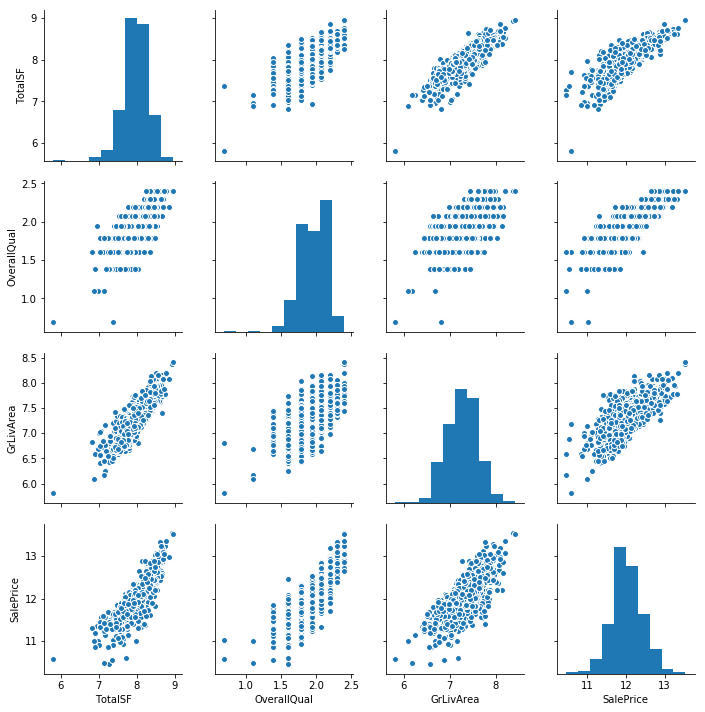

In [22]:
sns.pairplot(train.loc[:,[ 'TotalSF', 'OverallQual', 'GrLivArea',"SalePrice"]])
# plt.savefig('figure8.png')

In [23]:
# sns.pairplot(train.loc[:,["OverallQual","OverallQual_2","OverallQual_3","GrLivArea","YearBuilt","SalePrice"]])

In [24]:
# train = train[~(train['OverallQual_2'] < 2)]

In [25]:
train = train[~(train['SalePrice'] < 11.1)]
train = train[~(train['SalePrice'] < 11.1)]

In [26]:
# sns.pairplot(train.loc[:,[ 'TotalSF', 'OverallQual','OverallQual_2', 'GrLivArea', 'YearBuilt',"SalePrice"]])
# plt.savefig('figure9.png')

In [27]:
# sns.pairplot(train.loc[:,["OverallQual","OverallQual_2","OverallQual_3","GrLivArea","YearBuilt","SalePrice"]])

In [28]:
b

In [29]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.0005)
reg.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
print("ラッソ回帰でのRMSE:",np.sqrt(mean_squared_error(reg.predict(X_test), y_test)))

ラッソ回帰でのRMSE: 0.10594660248626722
